In [ ]:
!conda install keras

/bin/bash: conda: command not found


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [57]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
T = np.array([[0],
              [1],
              [1],
              [0]])
print (X)
print (T)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


In [61]:
model = Sequential()
model.add(Dense(units=2, input_dim=2)) # Dense=全結合層
model.add(Activation('sigmoid'))
model.add(Dense(units=1))
model.add(Activation('sigmoid')) # 活性化関数

# 訓練プロセスの作成: 勾配法=SGD、損失関数=binary_crossentropy、評価関数：-）
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
# モデルの概要を表示
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 6         
_________________________________________________________________
activation_14 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [62]:
l = model.layers[0]
print (l.get_weights())

[array([[-0.22542638, -0.06320679],
       [-0.27946776,  0.6428038 ]], dtype=float32), array([0., 0.], dtype=float32)]


In [63]:
# 第1引数、第2引数: 入力データ
# batch_size: バッチサイズ。
# epochs: 訓練を行う回数を指定します。
# verbose: 指定する数値により実行ログの出す内容が変わります。
# validation_data: 評価用のデータを指定します。
# 戻り値・・・訓練の損失値と評価関数値が返ってきます。

history = model.fit(X, T, epochs=1000, batch_size=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7548
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7438
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7354
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7310
Epoch 5/1000
4/4 [==============================] - 0s 958us/step - loss: 0.7267
Epoch 6/1000
4/4 [==============================] - 0s 998us/step - loss: 0.7220
Epoch 7/1000
4/4 [==============================] - 0s 948us/step - loss: 0.7202
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7188
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7176
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7156
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7155
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7151
Epoch 13/1000
4/4 [========================

In [64]:
history

In [65]:
print (model.layers[0].get_weights())

[array([[-1.2203993 , -1.3056052 ],
       [-1.0865527 ,  0.90101093]], dtype=float32), array([-0.51187545, -1.0855726 ], dtype=float32)]


In [66]:
# 学習したモデルにXを与えた際の結果
Y = model.predict_classes(X, batch_size=1)

print (Y)
print (T==Y)

[[0]
 [1]
 [0]
 [1]]
[[ True]
 [ True]
 [False]
 [False]]


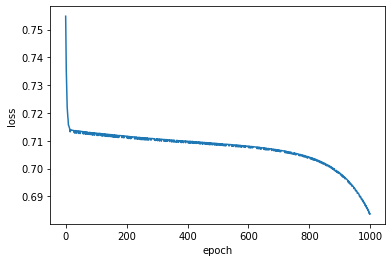

In [67]:
# 学習過程(loss)の可視化
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.5,1)
plt.show()
